In [1]:
# 1. Run the clustering algorithms on the datasets and describe what you see.

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from preprocessor import preprocess_dodgers, preprocess_wine_combo

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score, homogeneity_completeness_v_measure, calinski_harabasz_score 

import pickle
import time

random_state = 1337

In [2]:
# Uncomment one set to choose which dataset to use

# X_train, X_test, y_train, y_test = preprocess_dodgers()
# dataset_name = "Dodgers"

X_train, X_test, y_train, y_test, X_train_color, X_test_color = preprocess_wine_combo()
dataset_name = "Wine"
y_train = X_train_color

range_n_clusters = range(2, 33)

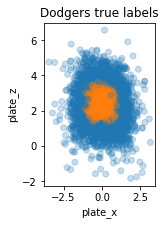

In [3]:
# create true labels figure to demonstrate issue with clustering
dataset1_fname = "dodgers.csv"
dataset1 = pd.read_csv(dataset1_fname)
colors = {"ball":'C0', "called_strike":'C1'}
c = [colors[val] for val in dataset1["description"]]
plt.figure(figsize=(2,3))
plt.scatter(dataset1["plate_x"], dataset1["plate_z"], c=c, alpha=0.25)
plt.title("Dodgers true labels")
plt.xlabel("plate_x")
plt.ylabel("plate_z")

# from scipy.stats import kurtosis, kurtosistest
# print(f"plate_x kurtosis: {kurtosis(dataset1['plate_x'])}\tplate_z kurtosis: {kurtosis(dataset1['plate_z'])}")
# print(kurtosistest(dataset1['plate_x']))
# print(kurtosistest(dataset1['plate_z']))

plt.show()

<ipython-input-4-8f947deda640>:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


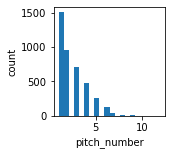

In [4]:
fig = plt.figure(figsize=(2,2))
plt.hist(dataset1["pitch_number"], bins=20)
plt.xlabel("pitch_number")
plt.ylabel("count")
fig.show()

In [5]:
km_models = {}
km_y_preds = {}
km_sse = {}
km_times = {}
km_silhouette_scores = {}
km_calinski_harabasz_scores = {}

for n_clusters in range_n_clusters:
    start_time = time.time()
    km_models[n_clusters] = KMeans(n_clusters=n_clusters, random_state=random_state).fit(X_train)
    km_y_preds[n_clusters] = km_models[n_clusters].predict(X_train)
    end_time = time.time()
    
    km_sse[n_clusters] = km_models[n_clusters].inertia_
    km_times[n_clusters] = end_time-start_time
    km_silhouette_scores[n_clusters] = silhouette_score(X_train, km_y_preds[n_clusters])
    km_calinski_harabasz_scores[n_clusters] = calinski_harabasz_score(X_train, km_y_preds[n_clusters])
#     plt.title(f"Dodgers k-means {n_clusters} clusters")
#     plt.xlabel("plate_x")
#     plt.ylabel("plate_z")
#     plt.scatter(X_train["plate_x"], X_train["plate_z"], c=km_y_preds[n_clusters])
#     plt.show()

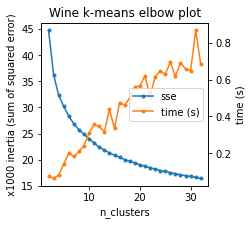

In [6]:
fig = plt.figure(figsize=(3,3))

ax = fig.add_subplot(111)
plt.title(f"{dataset_name} k-means elbow plot")
plt.ylabel("x1000 inertia (sum of squared error)")
plt.xlabel("n_clusters")
ax.plot(list(km_sse.keys()), [val/1000 for val in list(km_sse.values())], marker='.', label="sse")

ax2=plt.twinx()
ax2.plot(list(km_times.keys()), list(km_times.values()), marker='.', c='C1', label="time (s)")
ax2.set_ylabel("time (s)")

# ax2 = plt.twinx()
# ax2.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o', c='C1', label="avg silhouette")
# ax2.set_ylabel("silhouette")

# https://stackoverflow.com/a/10129461
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="center right")
plt.show()


n_clusters= 2 	average silhouette_score: 0.27509167617074376
n_clusters= 3 	average silhouette_score: 0.23729449681097842
n_clusters= 4 	average silhouette_score: 0.24952865584653255
n_clusters= 5 	average silhouette_score: 0.1843990079053872
n_clusters= 6 	average silhouette_score: 0.18975153947602996
n_clusters= 7 	average silhouette_score: 0.1770343003354172
n_clusters= 8 	average silhouette_score: 0.16162667446548243
n_clusters= 9 	average silhouette_score: 0.1503910011689853
n_clusters= 10 	average silhouette_score: 0.14894766483557062
n_clusters= 11 	average silhouette_score: 0.14786058943287742
n_clusters= 12 	average silhouette_score: 0.14779794979711688
n_clusters= 13 	average silhouette_score: 0.14384241468913384
n_clusters= 14 	average silhouette_score: 0.14887410880331978
n_clusters= 15 	average silhouette_score: 0.14349677600647068
n_clusters= 16 	average silhouette_score: 0.14677887828059538
n_clusters= 17 	average silhouette_score: 0.14240683451139619
n_clusters= 18 	ave

<ipython-input-7-88d49f2f2f1e>:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, (ax1) = plt.subplots(1, 1)


n_clusters= 22 	average silhouette_score: 0.13313250470767718
n_clusters= 23 	average silhouette_score: 0.1279163351987796
n_clusters= 24 	average silhouette_score: 0.12828507898763375
n_clusters= 25 	average silhouette_score: 0.13083489586347094
n_clusters= 26 	average silhouette_score: 0.13032775677274022
n_clusters= 27 	average silhouette_score: 0.12922527410952628
n_clusters= 28 	average silhouette_score: 0.12500586607000969
n_clusters= 29 	average silhouette_score: 0.12366855767623058
n_clusters= 30 	average silhouette_score: 0.11937952595185836
n_clusters= 31 	average silhouette_score: 0.1262478000633742
n_clusters= 32 	average silhouette_score: 0.1280662412020142


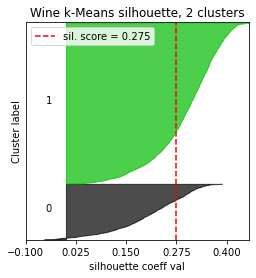

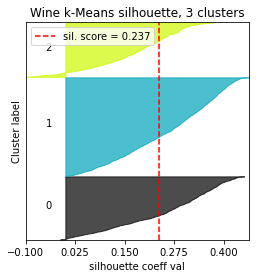

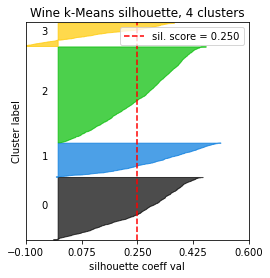

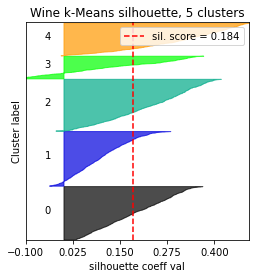

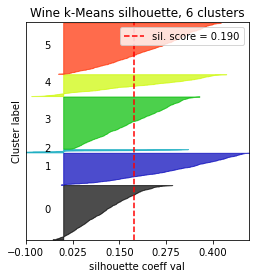

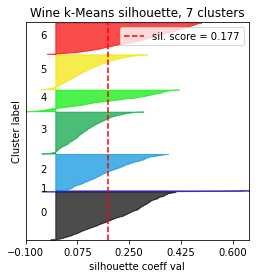

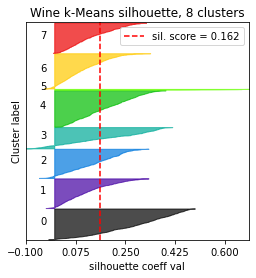

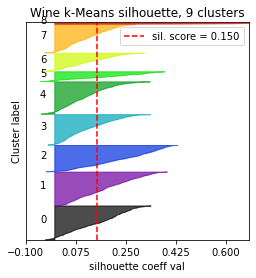

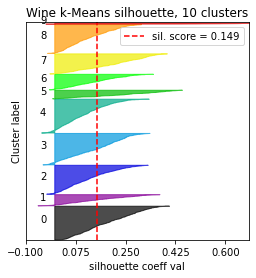

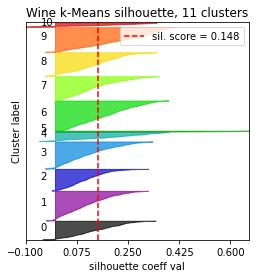

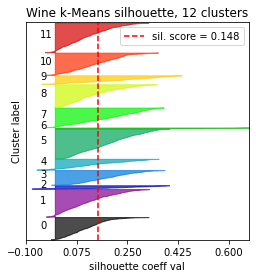

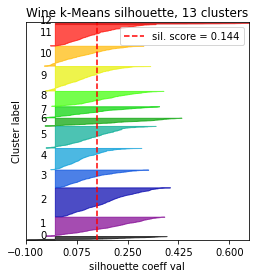

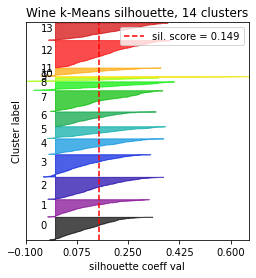

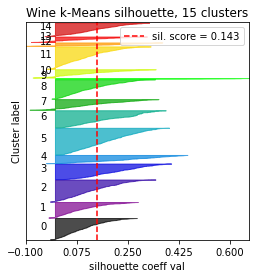

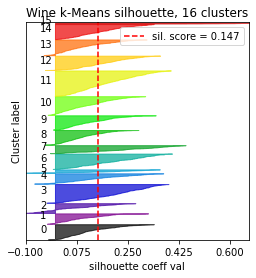

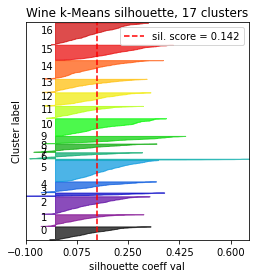

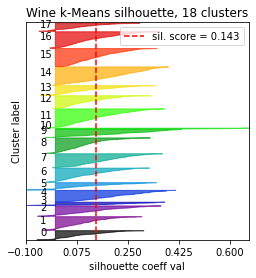

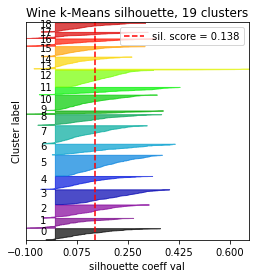

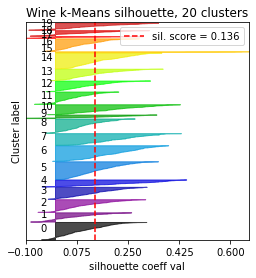

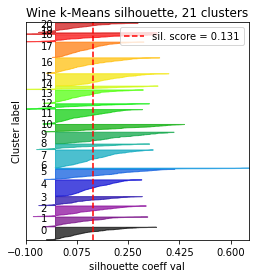

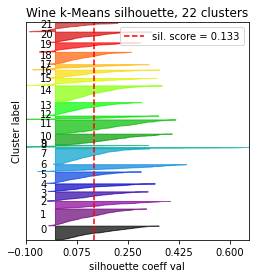

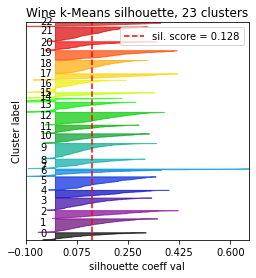

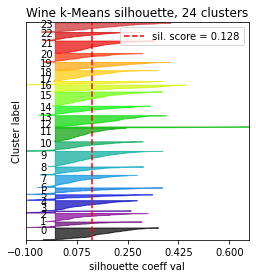

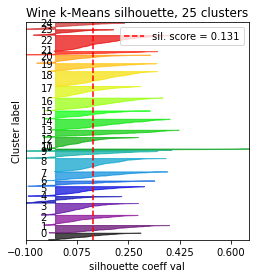

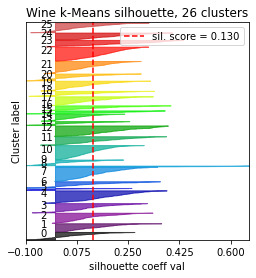

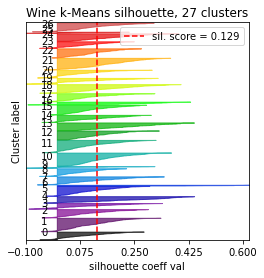

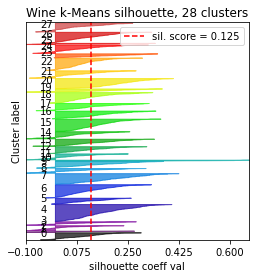

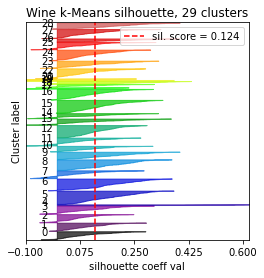

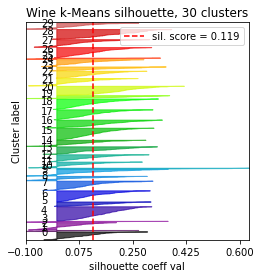

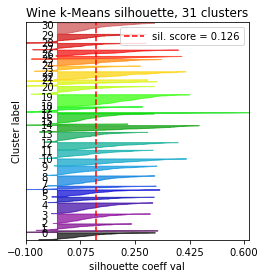

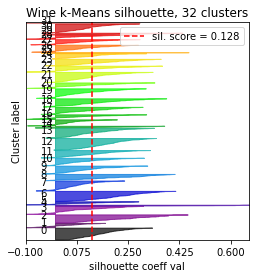

In [7]:
silhouettes = {}

# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
import matplotlib.cm as cm

X = X_train
y = y_train

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_size_inches(4, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]

    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = km_models[n_clusters]
    cluster_labels = km_y_preds[n_clusters]

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouettes[n_clusters] = silhouette_avg
    print("n_clusters=", n_clusters,
          "\taverage silhouette_score:", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    ax1.set_xlim([-0.1, np.max(sample_silhouette_values)])

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_xlabel("silhouette coeff val")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--", label=f"sil. score = {silhouette_avg:.3f}")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    #ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    ax1.set_xticks(list(np.linspace(-0.1, round(np.max(sample_silhouette_values) * 5)/5, 5)))

    plt.title((f"{dataset_name} k-Means silhouette,"
                  " %d clusters" % n_clusters))
    plt.legend()

plt.show()

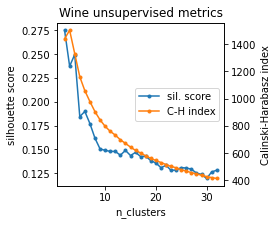

In [8]:
fig = plt.figure(figsize=(3,3))

ax = fig.add_subplot(111)
plt.title(f"{dataset_name} unsupervised metrics")
plt.ylabel("silhouette score")
plt.xlabel("n_clusters")
ax.plot(list(silhouettes.keys()), list(silhouettes.values()), marker='.', label="sil. score")


ax2=plt.twinx()
ax2.plot(list(km_calinski_harabasz_scores.keys()), list(km_calinski_harabasz_scores.values()), marker='.', c='C1', label="C-H index")
ax2.set_ylabel("Calinski-Harabasz index")

# https://stackoverflow.com/a/10129461
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="center right")
plt.show()

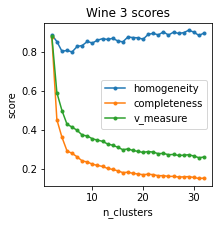

In [9]:
three_measures = {}
for n_clusters in range_n_clusters:
    three_measures[n_clusters] = homogeneity_completeness_v_measure(y_train, km_y_preds[n_clusters])
    #print(f"{n_clusters} homogeneity: {km_homogeneities[n_clusters]}")
    
fig = plt.figure(figsize=(3,3))

ax = fig.add_subplot(111)
plt.title(f"{dataset_name} 3 scores")
plt.ylabel("score")
plt.xlabel("n_clusters")
ax.plot(list(three_measures.keys()), [val[0] for val in three_measures.values()], marker='.', label="homogeneity")
ax.plot(list(three_measures.keys()), [val[1] for val in three_measures.values()], marker='.', label="completeness")
ax.plot(list(three_measures.keys()), [val[2] for val in three_measures.values()], marker='.', label="v_measure")


# https://stackoverflow.com/a/10129461
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines, labels )
plt.show()

In [10]:
# set this
best_n_clusters = 2

In [11]:
three_measures[best_n_clusters]

(0.8862155484327273, 0.8762273340531087, 0.881193138360741)

In [12]:
# this takes a really long time, so don't accidentally do one we don't need
do_pairplot = False
if do_pairplot:
    seaborn_temp = X_train
    seaborn_temp["y_pred"] = km_y_preds[best_n_clusters]

    # https://stackoverflow.com/a/33412861
    g = sns.PairGrid(seaborn_temp, hue="y_pred")
    g = g.map_offdiag(plt.scatter, alpha=0.01)
    g = g.map_diag(plt.hist, alpha=0.5)

    xlabels,ylabels = [],[]

    for ax in g.axes[-1,:]:
        xlabel = ax.xaxis.get_label_text()
        xlabels.append(xlabel)
    for ax in g.axes[:,0]:
        ylabel = ax.yaxis.get_label_text()
        ylabels.append(ylabel)

    for i in range(len(xlabels)):
        for j in range(len(ylabels)):
            g.axes[j,i].xaxis.set_label_text(xlabels[i])
            if i==j:
                g.axes[j,i].yaxis.set_label_text("count")
            else:
                g.axes[j,i].yaxis.set_label_text(ylabels[j])

    g.savefig(f"output/{dataset_name}/kmeans-pairplot.png")

In [13]:
best_y_pred = pd.DataFrame(km_y_preds[best_n_clusters])
best_y_pred.to_csv(f"output/{dataset_name}/kmeans-train-k={best_n_clusters}-clusters.csv")
pickle.dump( km_models[best_n_clusters], open(f"output/{dataset_name}/kmeans-bestmodel-k={best_n_clusters}.p", "wb" ) )

In [14]:
X_test_predicted = pd.DataFrame(km_models[best_n_clusters].predict(X_test))
X_test_predicted.to_csv(f"output/{dataset_name}/kmeans-test-k={best_n_clusters}-clusters.csv")